## Task 1: Setup your development environment and store the test video locally (10 points)

I setup the docker enivorement using the dev container inside the HW3 folder, I used a pytorch nvidia based image.

## Task 2: Object Detection (40 points)

I ran a modified script from homework 1 to install all the videos I needed and get the frames

In [25]:
%pip install pytubefix
import pandas as pd
from pytubefix import YouTube
import os


def grab_videos(links):
    # Grab the current directory
    curr_dir = os.getcwd()
    # Read video links from a file
    for link in links:
        # Create the YouTube object to access everything
        video = YouTube(link)
        folder = "Videos"

        # Make the path for captions to be written to and video downloaded into
        folder_path = os.path.join(curr_dir, folder)

        if not os.path.exists(folder):
            os.mkdir(folder)

        video.streams.get_by_itag(22).download(output_path=folder_path)

    print("DONE")


Note: you may need to restart the kernel to use updated packages.


In [26]:
links =["https://www.youtube.com/watch?v=WeF4wpw7w9k", "https://www.youtube.com/watch?v=5dRramZVu2Q", "https://www.youtube.com/watch?v=2NFwY15tRtA" ]
# had to come back to these videos since they were too big
grab_videos(links) 

DONE


I used ffmpeg this time because I wanted to see if it was better in terms of runtime and it was quite a bit faster. However, I went back to opencv when converting back into a vdieo.

In [27]:
import os
import subprocess

def extract_frames(video_path, output_folder, name):
    """
    Extract frames from a video and save them as individual image files.

    Args:
        video_path (str): Path to the input video file.
        output_folder (str): Path to the output folder where frames will be saved.
    """
    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Run FFmpeg command to extract frames
    cmd = f"ffmpeg -i {video_path} -vf fps=30 {output_folder}/{name}_%04d.png"
    subprocess.run(cmd, shell=True)

    print(f"Frames extracted and saved to {output_folder}")

# Example usage
output_folder = "Frames"
videos = [ ["Videos/'Cyclist and vehicle Tracking - 1.mp4'", "Cyclist_and_Vehicle_1"], ["Videos/'Cyclist and vehicle tracking - 2.mp4'", 'Cyclist_and_Vehicle_2'], ["Videos/'Drone Tracking Video.mp4'", "Drone_Track"] ]
## way too big 3)  saved for another time 2)  ,
for i in videos:
    extract_frames(i[0], output_folder, i[1])


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

Frames extracted and saved to Frames


frame=  490 fps=100 q=-0.0 Lsize=N/A time=00:00:16.33 bitrate=N/A speed=3.34x    
video:840373kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: unknown
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --en

Frames extracted and saved to Frames


Frames extracted and saved to Frames


frame= 2250 fps= 70 q=-0.0 Lsize=N/A time=00:01:15.00 bitrate=N/A speed=2.32x    
video:4344940kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: unknown


A note on models, it was hell on water with this one assgniment, I tried fastercnn but that only could detect a single frame out of the thousands. I switched to YOLOv8 and had more success however that was still very lack luster. So I tried training the YOLOv8 on the visdrone dataset like how it was shown on the YOLO website example, however, I do not have a powerful enough gpu and did not have enough time to understand how to modify the gpu clustering Wulver to make it run for my program so I went on huggingface and downloaded a pretrained one. I feel that if I were able to train it myself it would have better parameters. But first is intalling all the required packages. 

In [28]:
%pip install ultralytics

Note: you may need to restart the kernel to use updated packages.


I left this one example in since it was good refernce for udnerstanding how to write the code that allows me to draw on frames I pulled out of the video. It was given on the YOLOv8 website but does not work anymore since I have removed the large files holding the data but kept the cell since I refernced it alot later on.
## DO NOT RUN HERE FOR REFERNCE

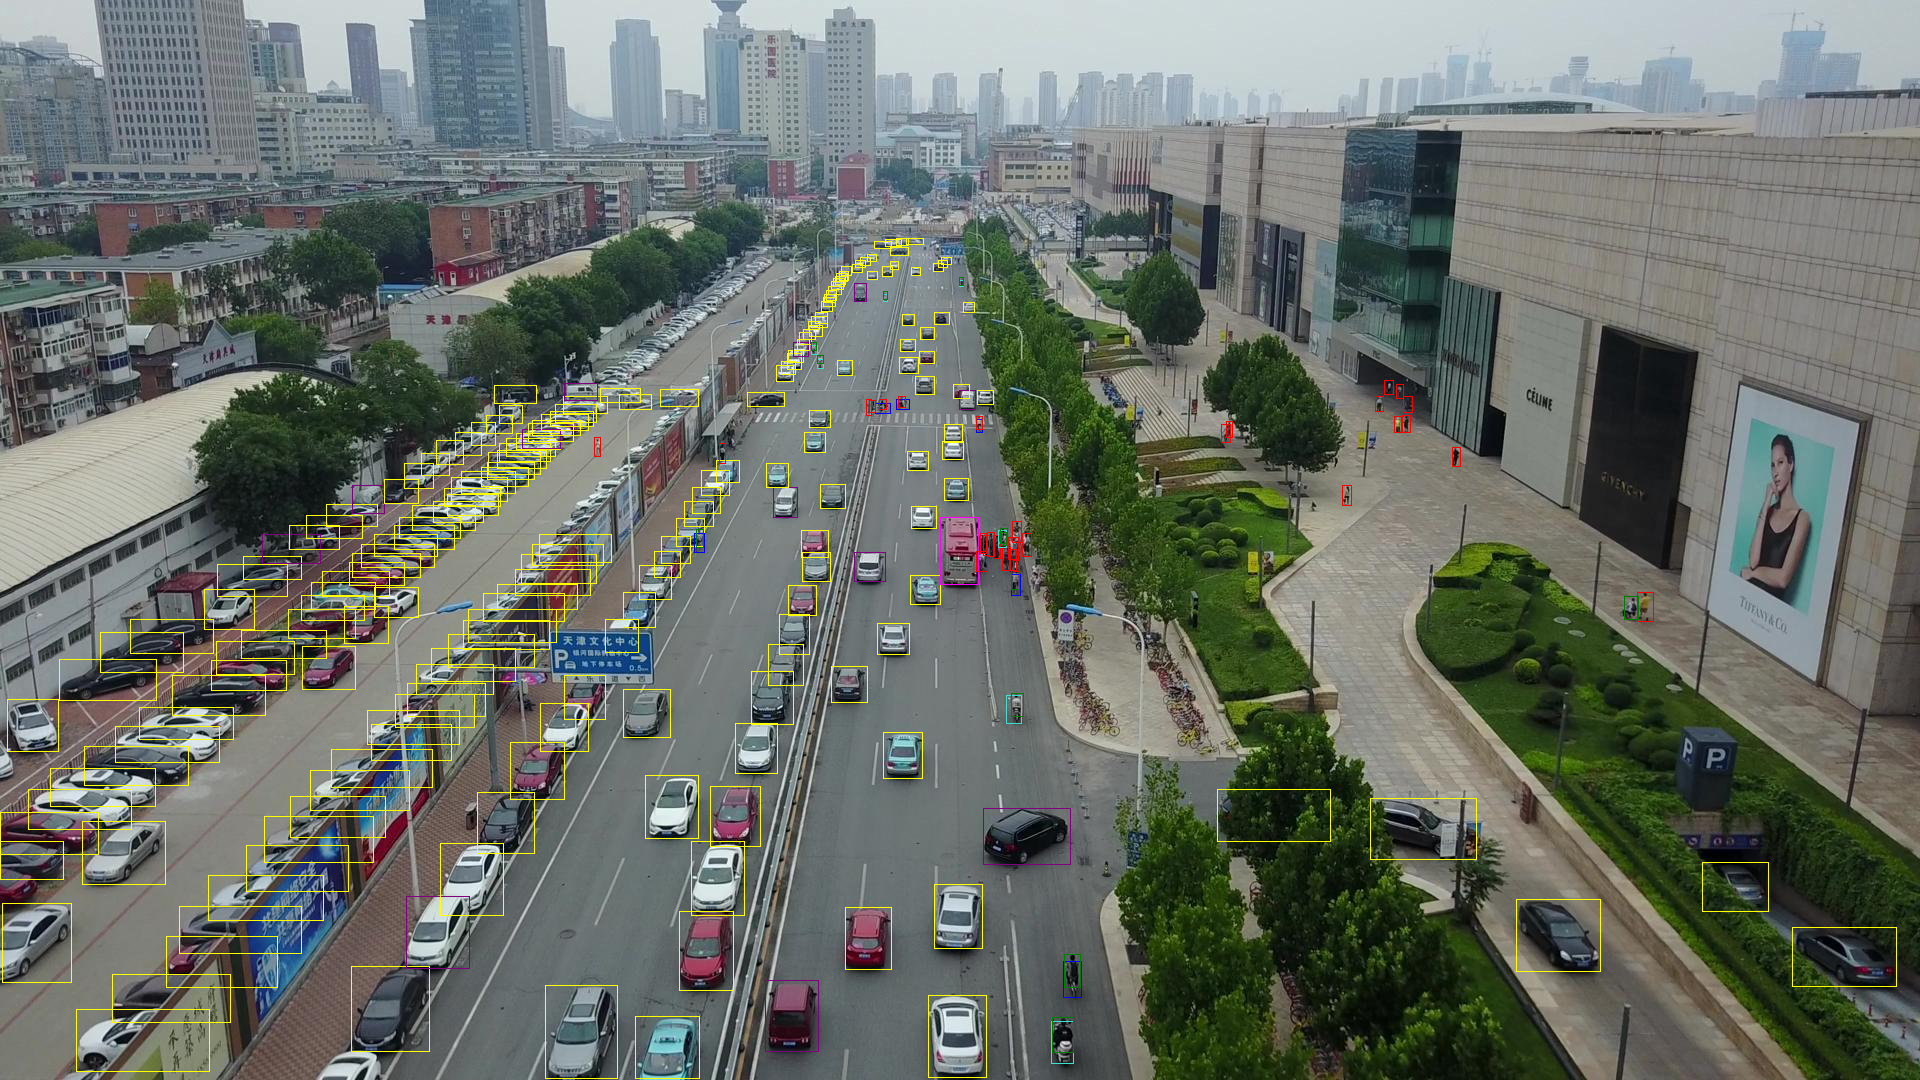

In [ ]:
# Code to read annotations in the YOLO format and draw
# and display bounding boxes on the associated image file
#
# Follow this directory structure to use this code as-is
#
# └── working directory 
#      └── visDrone2YOLO.py
#      └── viewConvertedLabels.py
#      └── filterVisDroneLabels.py
#      └── VisDrone2019-DET-train
#               └── images
#               └── labels 
#      └── VisDrone2019-DET-val
#               └── images
#               └── labels
#      └── VisDrone2019-DET-test-dev
#               └── images
#               └── labels

from PIL import Image, ImageDraw

file_name = "0000126_00054_d_0000124"
image_filepath = "Dataset/VisDrone2019-DET-train/images/" + file_name + ".jpg"
label_filepath = "Dataset/VisDrone2019-DET-train/labels/" + file_name + ".txt"

# To convert annotations from YOLO format to absolute corner points of a rectangle
def yolo_to_bounding_box(image_class, b_box, w, h):
    # x_center, y_center, width heigth
    half_width = (b_box[2] * w) / 2
    half_height = (b_box[3] * h) / 2
    x_min = int((b_box[0] * w) - half_width)
    y_min = int((b_box[1] * h) - half_height)
    x_max = int((b_box[0] * w) + half_width)
    y_max = int((b_box[1] * h) + half_height)
    return [image_class, x_min, y_min, x_max, y_max]

# To draw bounding boxes on the image
def draw_boxes(img, b_boxes):
    draw = ImageDraw.Draw(img)

    # To assign color based on class label
    color_list = ["red", "green", "blue", "yellow", "purple", "orange", "pink", "teal", "magenta", "turquoise"]

    for b_box in b_boxes:
        draw.rectangle(b_box[1:], outline=color_list[int(b_box[0])], width=1)
    img.show()

# Program start
img = Image.open(image_filepath)
bounding_boxes= []

with open(label_filepath, 'r', encoding='utf8') as file:
    for line in file:
        data = line.strip().split(' ')
        image_class = data[0]
        bounding_box = [float(val) for val in data[1:]]
        bounding_boxes.append(yolo_to_bounding_box(image_class,bounding_box, img.size[0], img.size[1]))

draw_boxes(img, bounding_boxes)

The cell below is me trying to train the model and it did not work lol. Took too much time for something that gave less then desired results. It will not work anymore, but kept so you can see the time it took to train. I wanted to train it over 100 epochs with 640px as recommended by the YOLOv8 website for the best detection but that was not possible.
## DO NOT RUN HERE FOR REFERNCE

In [11]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)

# Train the model
results = model.train(data='VisDrone.yaml', epochs=20, imgsz=320)

Ultralytics YOLOv8.0.43 🚀 Python-3.10.12 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 2070, 8192MiB)


yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=VisDrone.yaml, epochs=20, patience=50, batch=16, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, min_memory=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, split=val, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=None, workspace=4, nms=False, lr0=0.01, lrf=0.01,

Test run to see how well it preformed with a randomly selected pciture

In [30]:
from ultralyticsplus import YOLO, render_result

# load model
model = YOLO('mshamrai/yolov8s-visdrone')

# set model parameters
model.overrides['conf'] = 0.25  # NMS confidence threshold
model.overrides['iou'] = 0.45  # NMS IoU threshold
model.overrides['agnostic_nms'] = True  # NMS class-agnostic
model.overrides['max_det'] = 1000  # maximum number of detections per image

# set image
image = '/home/hamdi/cs370_homeworks/HW3-DroneFollowMe/Frames/Cyclist_and_Vehicle_1_0079.png'

# perform inference
results2 = model(image)
results = model.predict(image)

# observe results
for res in results2:
    print("CLASS: ", res[0].boxes)
print("RESULTS: ",results[0].boxes[0][-1])
render = render_result(model=model, image=image, result=results[0])
render.save('jack.jpg')


Ultralytics YOLOv8.0.43 🚀 Python-3.10.12 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 2070, 8192MiB)
Model summary (fused): 168 layers, 11129454 parameters, 0 gradients, 28.5 GFLOPs

image 1/1 /home/hamdi/cs370_homeworks/HW3-DroneFollowMe/Frames/Cyclist_and_Vehicle_1_0079.png: 352x640 1 car, 48.6ms
Speed: 0.8ms preprocess, 48.6ms inference, 355.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/hamdi/cs370_homeworks/HW3-DroneFollowMe/Frames/Cyclist_and_Vehicle_1_0079.png: 352x640 1 car, 31.2ms
Speed: 0.7ms preprocess, 31.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


CLASS:  tensor([[627.00000, 609.00000, 693.00000, 662.00000,   0.89558,   3.00000]], device='cuda:0')
RESULTS:  tensor([[627.00000, 609.00000, 693.00000, 662.00000,   0.89558,   3.00000]], device='cuda:0')


Than ran it on all the frames I had parsed

In [34]:
from ultralyticsplus import YOLO
from tqdm import tqdm
import pandas as pd
import os

# Load a model
model = YOLO('mshamrai/yolov8s-visdrone')  # load a pretrained model (recommended for training)
obj_result = pd.DataFrame(columns=["vidId", "frameNum", "timestamp", "detectedObjId", "detectedObjClass", "confidence", "bbox info"])

# set model parameters
model.overrides['conf'] = 0.25  # NMS confidence threshold
model.overrides['iou'] = 0.45  # NMS IoU threshold
model.overrides['agnostic_nms'] = False  # NMS class-agnostic
model.overrides['max_det'] = 20

frames_folder = "Frames"
class_names = ["pedestrian", "people", "bicycle", "car", "van", "truck", "tricycle", "awning-tricycle", "bus", "motor"]

for filename in tqdm(os.listdir(frames_folder)):
    
    image_path = os.path.join(frames_folder, filename)
    results = model.predict(image_path, classes=[2, 3, 9], save=True) 
    parts = filename.split("_")  
    frameNum = parts[-1].split(".")[0]
    vidId = parts[-2]


    result = results[0]
    # have to send it cpu since by default it uses my gpu which cannot use numpy, cool thing i found out
    for box in result.boxes.cpu():
        classId = int(box.cls.item())
        if classId != 2 and classId != 3: 
            continue

        className = class_names[classId]
        conf = box.conf.item()
        bbox = box.xyxy.numpy()
        x1, y1, x2, y2 = bbox[0, 0], bbox[0, 1], bbox[0, 2], bbox[0, 3]
        
        new_entry = {"vidId" : vidId, "frameNum": frameNum, "detectedObjId" : classId, "detectedObjClass" : className, "confidence" : conf, "bbox info" : {"x1": x1, "y1": y1, "x2" : x2, "y2": y2} }
        obj_result.loc[len(obj_result.index)] = new_entry

display(obj_result.sort_values(by=["vidId", "frameNum"]))
    

  0%|          | 0/4088 [00:00<?, ?it/s]Ultralytics YOLOv8.0.43 🚀 Python-3.10.12 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 2070, 8192MiB)
Model summary (fused): 168 layers, 11129454 parameters, 0 gradients, 28.5 GFLOPs

image 1/1 /home/hamdi/cs370_homeworks/HW3-DroneFollowMe/Frames/Cyclist_and_Vehicle_1_0406.png: 352x640 1 car, 6.4ms
Speed: 0.4ms preprocess, 6.4ms inference, 11.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /home/hamdi/cs370_homeworks/runs/detect/predict
  0%|          | 1/4088 [00:00<29:45,  2.29it/s]
image 1/1 /home/hamdi/cs370_homeworks/HW3-DroneFollowMe/Frames/Drone_Track_0908.png: 384x640 (no detections), 35.9ms
Speed: 0.5ms preprocess, 35.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /home/hamdi/cs370_homeworks/runs/detect/predict

image 1/1 /home/hamdi/cs370_homeworks/HW3-DroneFollowMe/Frames/Cyclist_and_Vehicle_1_0798.png: 352x640 (no detections), 8.8ms
Speed: 0.5ms preprocess, 8.8ms inference, 0.

vidId frameNum  timestamp  detectedObjId detectedObjClass  confidence  \
350       1     0064        NaN              3              car    0.310679   
300       1     0065        NaN              3              car    0.548043   
1112      1     0066        NaN              3              car    0.697317   
896       1     0067        NaN              3              car    0.694039   
48        1     0068        NaN              3              car    0.786620   
...     ...      ...        ...            ...              ...         ...   
1219  Track     2246        NaN              3              car    0.772266   
1218  Track     2247        NaN              3              car    0.778261   
987   Track     2248        NaN              3              car    0.671056   
437   Track     2249        NaN              3              car    0.619893   
519   Track     2250        NaN              3              car    0.749080   

                                              bbox info  
350   {'x1': 560.0, 'y1': 667.0, 'x2': 611.0, 'y2': ...  
300   {'x1': 551.0, 'y1': 662.0, 'x2': 617.0, 'y2': ...  
1112  {'x1': 555.0, 'y1': 659.0, 'x2': 621.0, 'y2': ...  
896   {'x1': 559.0, 'y1': 654.0, 'x2': 629.0, 'y2': ...  
48    {'x1': 563.0, 'y1': 650.0, 'x2': 633.0, 'y2': ...  
...                                                 ...  
1219  {'x1': 365.0, 'y1': 91.0, 'x2': 420.0, 'y2': 1...  
1218  {'x1': 367.0, 'y1': 91.0, 'x2': 422.0, 'y2': 1...  
987   {'x1': 369.0, 'y1': 91.0, 'x2': 421.0, 'y2': 1...  
437   {'x1': 371.0, 'y1': 91.0, 'x2': 425.0, 'y2': 1...  
519   {'x1': 374.0, 'y1': 91.0, 'x2': 429.0, 'y2': 1...  

[1263 rows x 7 columns]

In [35]:
#saved just in case
df = obj_result
obj_result.to_json("objects.json", orient="records")

In [36]:
obj_result = pd.read_json("objects.json")

In [43]:
unique_ids = df['vidId'].unique()

# Create a dictionary to hold the dataframes for each id
df_dict = {}

for unique_id in unique_ids:
    # Filter the DataFrame based on the id and save it to a new DataFrame
    df_filtered = df[df['vidId'] == unique_id]
    
    # Store the filtered DataFrame in a dictionary
    df_dict[unique_id] = df_filtered

print(df['vidId'].unique())
# Now you can access each DataFrame using its id
df1 = df_dict['1']
df2 = df_dict['2']
df_track = df_dict['Track']

# Display the DataFrame for id '1' as an example
display(df1)
display(df2)
display(df_track)

['1' 'Track' '2']


vidId frameNum  timestamp  detectedObjId detectedObjClass  confidence  \
0        1     0406        NaN              3              car    0.446338   
1        1     0169        NaN              3              car    0.801847   
4        1     0411        NaN              3              car    0.609732   
5        1     0411        NaN              3              car    0.430204   
7        1     0225        NaN              3              car    0.698601   
...    ...      ...        ...            ...              ...         ...   
1255     1     0712        NaN              3              car    0.509717   
1257     1     0125        NaN              3              car    0.688746   
1258     1     0146        NaN              3              car    0.754070   
1259     1     0930        NaN              3              car    0.297143   
1261     1     0157        NaN              3              car    0.849142   

                                              bbox info  
0     {'x1': 614.0, 'y1': 630.0, 'x2': 638.0, 'y2': ...  
1     {'x1': 856.0, 'y1': 477.0, 'x2': 892.0, 'y2': ...  
4     {'x1': 1121.0, 'y1': 245.0, 'x2': 1160.0, 'y2'...  
5     {'x1': 612.0, 'y1': 633.0, 'x2': 636.0, 'y2': ...  
7     {'x1': 963.0, 'y1': 386.0, 'x2': 990.0, 'y2': ...  
...                                                 ...  
1255  {'x1': 931.0, 'y1': 413.0, 'x2': 964.0, 'y2': ...  
1257  {'x1': 717.0, 'y1': 439.0, 'x2': 763.0, 'y2': ...  
1258  {'x1': 785.0, 'y1': 445.0, 'x2': 826.0, 'y2': ...  
1259  {'x1': 803.0, 'y1': 559.0, 'x2': 831.0, 'y2': ...  
1261  {'x1': 822.0, 'y1': 500.0, 'x2': 861.0, 'y2': ...  

[791 rows x 7 columns]

vidId frameNum  timestamp  detectedObjId detectedObjClass  confidence  \
31       2     0358        NaN              3              car    0.626435   
46       2     0386        NaN              3              car    0.797579   
47       2     0373        NaN              3              car    0.803081   
162      2     0370        NaN              3              car    0.827749   
190      2     0362        NaN              3              car    0.779556   
...    ...      ...        ...            ...              ...         ...   
1222     2     0368        NaN              3              car    0.793285   
1224     2     0352        NaN              3              car    0.312803   
1232     2     0417        NaN              3              car    0.474652   
1252     2     0382        NaN              3              car    0.827471   
1260     2     0367        NaN              3              car    0.778300   

                                              bbox info  
31    {'x1': 579.0, 'y1': 626.0, 'x2': 644.0, 'y2': ...  
46    {'x1': 601.0, 'y1': 590.0, 'x2': 645.0, 'y2': ...  
47    {'x1': 581.0, 'y1': 607.0, 'x2': 635.0, 'y2': ...  
162   {'x1': 579.0, 'y1': 610.0, 'x2': 634.0, 'y2': ...  
190   {'x1': 578.0, 'y1': 621.0, 'x2': 638.0, 'y2': ...  
...                                                 ...  
1222  {'x1': 578.0, 'y1': 616.0, 'x2': 636.0, 'y2': ...  
1224  {'x1': 584.0, 'y1': 638.0, 'x2': 643.0, 'y2': ...  
1232  {'x1': 719.0, 'y1': 547.0, 'x2': 746.0, 'y2': ...  
1252  {'x1': 591.0, 'y1': 594.0, 'x2': 638.0, 'y2': ...  
1260  {'x1': 578.0, 'y1': 615.0, 'x2': 636.0, 'y2': ...  

[78 rows x 7 columns]

vidId frameNum  timestamp  detectedObjId detectedObjClass  confidence  \
2     Track     2117        NaN              3              car    0.816006   
3     Track     2110        NaN              3              car    0.754981   
6     Track     2116        NaN              3              car    0.796145   
8     Track     2091        NaN              3              car    0.736445   
9     Track     1835        NaN              3              car    0.276295   
...     ...      ...        ...            ...              ...         ...   
1249  Track     2123        NaN              3              car    0.805772   
1250  Track     2098        NaN              3              car    0.766745   
1254  Track     1736        NaN              3              car    0.317960   
1256  Track     2084        NaN              3              car    0.749018   
1262  Track     0562        NaN              3              car    0.272571   

                                              bbox info  
2     {'x1': 133.0, 'y1': 80.0, 'x2': 187.0, 'y2': 1...  
3     {'x1': 137.0, 'y1': 79.0, 'x2': 190.0, 'y2': 1...  
6     {'x1': 134.0, 'y1': 79.0, 'x2': 188.0, 'y2': 1...  
8     {'x1': 155.0, 'y1': 76.0, 'x2': 204.0, 'y2': 9...  
9     {'x1': 946.0, 'y1': 67.0, 'x2': 984.0, 'y2': 8...  
...                                                 ...  
1249  {'x1': 126.0, 'y1': 81.0, 'x2': 182.0, 'y2': 1...  
1250  {'x1': 149.0, 'y1': 77.0, 'x2': 200.0, 'y2': 9...  
1254  {'x1': 0.0, 'y1': 413.0, 'x2': 75.0, 'y2': 455.0}  
1256  {'x1': 156.0, 'y1': 75.0, 'x2': 208.0, 'y2': 9...  
1262  {'x1': 899.0, 'y1': 463.0, 'x2': 927.0, 'y2': ...  

[394 rows x 7 columns]

Saving these sorted just in case I need them later on

In [44]:
sorted_1 = df1.sort_values(by='frameNum')
sorted_1.reset_index(drop=True, inplace=True)
sorted_2 = df2.sort_values(by='frameNum')
sorted_2.reset_index(drop=True, inplace=True)
sorted_track = df_track.sort_values(by='frameNum')
sorted_track.reset_index(drop=True, inplace=True)

In [45]:
%pip install filterpy

Note: you may need to restart the kernel to use updated packages.


In [51]:
print("Video 1:",len(sorted_1))
print("Video 2:",len(sorted_2))
print("Video 3:", len(sorted_track))
display(sorted_1)
display(sorted_track)

Video 1: 791
Video 2: 78
Video 3: 394


vidId frameNum  timestamp  detectedObjId detectedObjClass  confidence  \
0       1     0064        NaN              3              car    0.310679   
1       1     0065        NaN              3              car    0.548043   
2       1     0066        NaN              3              car    0.697317   
3       1     0067        NaN              3              car    0.694039   
4       1     0068        NaN              3              car    0.786620   
..    ...      ...        ...            ...              ...         ...   
786     1     1163        NaN              3              car    0.636692   
787     1     1164        NaN              3              car    0.517790   
788     1     1165        NaN              3              car    0.496639   
789     1     1166        NaN              3              car    0.569508   
790     1     1168        NaN              3              car    0.553716   

                                             bbox info  
0    {'x1': 560.0, 'y1': 667.0, 'x2': 611.0, 'y2': ...  
1    {'x1': 551.0, 'y1': 662.0, 'x2': 617.0, 'y2': ...  
2    {'x1': 555.0, 'y1': 659.0, 'x2': 621.0, 'y2': ...  
3    {'x1': 559.0, 'y1': 654.0, 'x2': 629.0, 'y2': ...  
4    {'x1': 563.0, 'y1': 650.0, 'x2': 633.0, 'y2': ...  
..                                                 ...  
786  {'x1': 1021.0, 'y1': 665.0, 'x2': 1065.0, 'y2'...  
787  {'x1': 1024.0, 'y1': 667.0, 'x2': 1064.0, 'y2'...  
788  {'x1': 1029.0, 'y1': 669.0, 'x2': 1071.0, 'y2'...  
789  {'x1': 1037.0, 'y1': 671.0, 'x2': 1071.0, 'y2'...  
790  {'x1': 1044.0, 'y1': 673.0, 'x2': 1078.0, 'y2'...  

[791 rows x 7 columns]

vidId frameNum  timestamp  detectedObjId detectedObjClass  confidence  \
0    Track     0096        NaN              2          bicycle    0.326746   
1    Track     0106        NaN              2          bicycle    0.282193   
2    Track     0107        NaN              2          bicycle    0.278672   
3    Track     0204        NaN              3              car    0.535801   
4    Track     0205        NaN              3              car    0.330671   
..     ...      ...        ...            ...              ...         ...   
389  Track     2246        NaN              3              car    0.772266   
390  Track     2247        NaN              3              car    0.778261   
391  Track     2248        NaN              3              car    0.671056   
392  Track     2249        NaN              3              car    0.619893   
393  Track     2250        NaN              3              car    0.749080   

                                             bbox info  
0    {'x1': 641.0, 'y1': 384.0, 'x2': 667.0, 'y2': ...  
1    {'x1': 614.0, 'y1': 379.0, 'x2': 647.0, 'y2': ...  
2    {'x1': 613.0, 'y1': 377.0, 'x2': 645.0, 'y2': ...  
3    {'x1': 708.0, 'y1': 395.0, 'x2': 747.0, 'y2': ...  
4    {'x1': 709.0, 'y1': 396.0, 'x2': 752.0, 'y2': ...  
..                                                 ...  
389  {'x1': 365.0, 'y1': 91.0, 'x2': 420.0, 'y2': 1...  
390  {'x1': 367.0, 'y1': 91.0, 'x2': 422.0, 'y2': 1...  
391  {'x1': 369.0, 'y1': 91.0, 'x2': 421.0, 'y2': 1...  
392  {'x1': 371.0, 'y1': 91.0, 'x2': 425.0, 'y2': 1...  
393  {'x1': 374.0, 'y1': 91.0, 'x2': 429.0, 'y2': 1...  

[394 rows x 7 columns]

## Task 3 Kalman filter
After looking at the code I was barely able to understand it however, I think the way I intilazied my filters is wrong but it is the only way I could of making htem work. While the video compiled it was a bit janky when playing.

Video 1:

In [54]:
import numpy as np
import pandas as pd
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise

def smooth_border_boxes(df):
    noise=1
    Q=0.0001
    fk = KalmanFilter(dim_x=4, dim_z=4)  # 4-dimensional state and measurement

    # Extract the first bbox info as the initial state estimate
    first_bbox = df['bbox info'].iloc[0]
    print(first_bbox)
    fk.x = np.array([first_bbox['x1'], first_bbox['y1'], first_bbox['x2'], first_bbox['y2']])

    fk.F = np.eye(4)  # State transition matrix
    fk.H = np.eye(4)  # Measurement function
    fk.P *= 10.       # Covariance matrix
    fk.R = np.eye(4) * noise  # Measurement noise
    fk.Q = Q_discrete_white_noise(dim=2, dt=1., var=Q, block_size=2)  # Process noise

    smoothed_boxes = []

    for index, row in df.iterrows():
        bbox = row['bbox info']
        z = np.array([bbox['x1'], bbox['y1'], bbox['x2'], bbox['y2']])
        fk.predict()
        fk.update(z)
        smoothed_boxes.append(fk.x.copy())

    return smoothed_boxes

# Example usage, assuming obj_result is your dataframe and it has a column 'bbox_info' with bbox data as dictionaries
# obj_result = pd.DataFrame({
#     'bbox_info': [{'x1': 738.0, 'y1': 516.0, 'x2': 796.0, 'y2': 565.0}, ...]  # Add more bbox dictionaries as needed
# })
smooth_border_boxes(sorted)
smoothed_data = smooth_border_boxes(sorted)
print(smoothed_data)

{'x1': 559.0, 'y1': 667.0, 'x2': 611.0, 'y2': 684.0}
{'x1': 559.0, 'y1': 667.0, 'x2': 611.0, 'y2': 684.0}
[array([        559,         667,         611,         684]), array([     554.71,      664.62,      613.86,         684]), array([     554.48,      662.48,      616.16,         684]), array([     555.58,      660.41,      619.29,         684]), array([     556.84,      658.37,      621.98,         684]), array([     558.83,      656.34,      624.94,      684.17]), array([     560.69,      654.32,      627.62,      684.15]), array([     562.82,       652.3,      630.39,      684.13]), array([     565.26,      650.29,      633.09,      684.01]), array([     567.91,      648.38,      635.86,      683.71]), array([     557.44,      589.74,      622.24,      622.96]), array([     560.64,      592.84,      625.87,      627.87]), array([     563.96,      595.24,       629.4,      631.65]), array([     567.16,      596.94,      632.86,      634.68]), array([     570.34,      598.22,      6

In [57]:
from PIL import Image, ImageDraw
import os
# To draw bounding boxes on the image
def draw_boxes(img, index):
    draw = ImageDraw.Draw(img)
    x1, y1, x2, y2 = smoothed_data[index]
    top_left = (x1,y1)
    bottom_right = (x2,y2)
    draw.rectangle([top_left, bottom_right], outline='yellow', width=1)
    img.save(path)

# Program start
print(os.getcwd())
bounding_boxes= []
stitching_after = []
save_folder = "Saved"
for index in range(0,749):
    file_name = "Frames/Cyclist_and_Vehicle_" + sorted_1.iloc[index]['vidId'] + "_" + str(sorted_1.iloc[index]['frameNum']).zfill(4) + ".png"
    stitching_after.append(file_name)
    path = save_folder + "/detected_" + sorted_1.iloc[index]['vidId'] + "_" + str(sorted_1.iloc[index]['frameNum']).zfill(4) + ".png"
    print(file_name)
    img = Image.open(file_name)
    draw_boxes(img, index)
    img.close()

/home/hamdi/cs370_homeworks/HW3-DroneFollowMe
Frames/Cyclist_and_Vehicle_1_0064.png
Frames/Cyclist_and_Vehicle_1_0065.png
Frames/Cyclist_and_Vehicle_1_0066.png
Frames/Cyclist_and_Vehicle_1_0067.png
Frames/Cyclist_and_Vehicle_1_0068.png
Frames/Cyclist_and_Vehicle_1_0069.png
Frames/Cyclist_and_Vehicle_1_0070.png
Frames/Cyclist_and_Vehicle_1_0071.png
Frames/Cyclist_and_Vehicle_1_0072.png
Frames/Cyclist_and_Vehicle_1_0073.png
Frames/Cyclist_and_Vehicle_1_0073.png
Frames/Cyclist_and_Vehicle_1_0073.png
Frames/Cyclist_and_Vehicle_1_0074.png
Frames/Cyclist_and_Vehicle_1_0075.png
Frames/Cyclist_and_Vehicle_1_0076.png
Frames/Cyclist_and_Vehicle_1_0077.png
Frames/Cyclist_and_Vehicle_1_0078.png
Frames/Cyclist_and_Vehicle_1_0078.png
Frames/Cyclist_and_Vehicle_1_0079.png
Frames/Cyclist_and_Vehicle_1_0080.png
Frames/Cyclist_and_Vehicle_1_0081.png
Frames/Cyclist_and_Vehicle_1_0082.png
Frames/Cyclist_and_Vehicle_1_0083.png
Frames/Cyclist_and_Vehicle_1_0084.png
Frames/Cyclist_and_Vehicle_1_0085.png
Fram

IndexError: list index out of range

In [58]:
import cv2
import os

# Directory containing the images
image_dir = 'Saved'
output_video_path = 'output_video.mp4'
frame_rate = 24  # frames per second

# Get all the PNG files from the directory
image_files = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith('.png')]
image_files.sort()  # Sort the files by name

# Read the first image to determine the video size
first_image = cv2.imread(image_files[0])
height, width, layers = first_image.shape

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # or 'XVID', 'MJPG', 'X264', etc.
video = cv2.VideoWriter(output_video_path, fourcc, frame_rate, (width, height))

# Add images to video
for image_file in image_files:
    image = cv2.imread(image_file)
    video.write(image)

# Release the video writer
video.release()

print(f'Video saved as {output_video_path}')


Video saved as output_video.mp4


In [59]:
from IPython.display import Video

# Display the video in the Jupyter notebook cell
# Replace 'path_to_video.mp4' with the path to your video file
Video('output_video.mp4')

Video 2

In [60]:
import numpy as np
import pandas as pd
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise

def smooth_border_boxes(df):
    noise=1
    Q=0.0001
    fk = KalmanFilter(dim_x=4, dim_z=4)  # 4-dimensional state and measurement

    # Extract the first bbox info as the initial state estimate
    first_bbox = df['bbox info'].iloc[0]
    print(first_bbox)
    fk.x = np.array([first_bbox['x1'], first_bbox['y1'], first_bbox['x2'], first_bbox['y2']])

    fk.F = np.eye(4)  # State transition matrix
    fk.H = np.eye(4)  # Measurement function
    fk.P *= 10.       # Covariance matrix
    fk.R = np.eye(4) * noise  # Measurement noise
    fk.Q = Q_discrete_white_noise(dim=2, dt=1., var=Q, block_size=2)  # Process noise

    smoothed_boxes = []

    for index, row in df.iterrows():
        bbox = row['bbox info']
        z = np.array([bbox['x1'], bbox['y1'], bbox['x2'], bbox['y2']])
        fk.predict()
        fk.update(z)
        smoothed_boxes.append(fk.x.copy())

    return smoothed_boxes

# Example usage, assuming obj_result is your dataframe and it has a column 'bbox_info' with bbox data as dictionaries
# obj_result = pd.DataFrame({
#     'bbox_info': [{'x1': 738.0, 'y1': 516.0, 'x2': 796.0, 'y2': 565.0}, ...]  # Add more bbox dictionaries as needed
# })
smooth_border_boxes(sorted_2)
smoothed_data = smooth_border_boxes(sorted_2)
print(smoothed_data)

{'x1': 937.0, 'y1': 474.0, 'x2': 1004.0, 'y2': 504.0}
{'x1': 937.0, 'y1': 474.0, 'x2': 1004.0, 'y2': 504.0}
[array([        937,         474,        1004,         504]), array([     1048.4,      503.05,      1120.2,      534.96]), array([     1097.7,      515.95,      1161.4,      547.88]), array([     939.43,       500.8,      1012.5,      536.66]), array([     843.83,      492.57,      923.19,      530.62]), array([     779.42,      487.36,      863.63,      526.55]), array([     753.45,      510.28,      835.66,      548.74]), array([      733.4,      527.05,      814.23,      565.32]), array([     717.54,       539.8,      797.95,      578.15]), array([     704.52,      549.93,      784.49,      588.35]), array([     693.67,      558.42,      771.48,      596.43]), array([     684.61,         565,      760.86,      603.18]), array([     676.78,      570.35,      752.17,      608.74]), array([     670.06,      574.73,      744.79,      613.52]), array([     664.16,      578.46,     

In [61]:
from PIL import Image, ImageDraw
import os
# To draw bounding boxes on the image
def draw_boxes(img, index):
    draw = ImageDraw.Draw(img)
    x1, y1, x2, y2 = smoothed_data[index]
    top_left = (x1,y1)
    bottom_right = (x2,y2)
    draw.rectangle([top_left, bottom_right], outline='yellow', width=1)
    img.save(path)

# Program start
print(os.getcwd())
bounding_boxes= []
stitching_after = []
save_folder = "Saved2"
for index in range(0,72):
    file_name = "Frames/Cyclist_and_Vehicle_" + sorted_2.iloc[index]['vidId'] + "_" + str(sorted_2.iloc[index]['frameNum']).zfill(4) + ".png"
    stitching_after.append(file_name)
    path = save_folder + "/detected_" + sorted_2.iloc[index]['vidId'] + "_" + str(sorted_2.iloc[index]['frameNum']).zfill(4) + ".png"
    print(file_name)
    img = Image.open(file_name)
    draw_boxes(img, index)
    img.close()

/home/hamdi/cs370_homeworks/HW3-DroneFollowMe
Frames/Cyclist_and_Vehicle_2_0030.png
Frames/Cyclist_and_Vehicle_2_0055.png
Frames/Cyclist_and_Vehicle_2_0058.png
Frames/Cyclist_and_Vehicle_2_0125.png
Frames/Cyclist_and_Vehicle_2_0131.png
Frames/Cyclist_and_Vehicle_2_0132.png
Frames/Cyclist_and_Vehicle_2_0347.png
Frames/Cyclist_and_Vehicle_2_0348.png
Frames/Cyclist_and_Vehicle_2_0349.png
Frames/Cyclist_and_Vehicle_2_0350.png
Frames/Cyclist_and_Vehicle_2_0351.png
Frames/Cyclist_and_Vehicle_2_0352.png
Frames/Cyclist_and_Vehicle_2_0353.png
Frames/Cyclist_and_Vehicle_2_0354.png
Frames/Cyclist_and_Vehicle_2_0355.png
Frames/Cyclist_and_Vehicle_2_0356.png
Frames/Cyclist_and_Vehicle_2_0357.png
Frames/Cyclist_and_Vehicle_2_0358.png
Frames/Cyclist_and_Vehicle_2_0359.png
Frames/Cyclist_and_Vehicle_2_0360.png
Frames/Cyclist_and_Vehicle_2_0361.png
Frames/Cyclist_and_Vehicle_2_0362.png
Frames/Cyclist_and_Vehicle_2_0363.png
Frames/Cyclist_and_Vehicle_2_0364.png
Frames/Cyclist_and_Vehicle_2_0365.png
Fram

In [62]:
import cv2
import os

# Directory containing the images
image_dir = 'Saved2'
output_video_path = 'output_video2.mp4'
frame_rate = 24  # frames per second

# Get all the PNG files from the directory
image_files = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith('.png')]
image_files.sort()  # Sort the files by name

# Read the first image to determine the video size
first_image = cv2.imread(image_files[0])
height, width, layers = first_image.shape

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # or 'XVID', 'MJPG', 'X264', etc.
video = cv2.VideoWriter(output_video_path, fourcc, frame_rate, (width, height))

# Add images to video
for image_file in image_files:
    image = cv2.imread(image_file)
    video.write(image)

# Release the video writer
video.release()

print(f'Video saved as {output_video_path}')

Video saved as output_video2.mp4


In [63]:
from IPython.display import Video

# Display the video in the Jupyter notebook cell
# Replace 'path_to_video.mp4' with the path to your video file
Video('output_video2.mp4')

## Video 3

In [68]:
import numpy as np
import pandas as pd
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise

def smooth_border_boxes(df):
    noise=1
    Q=0.0001
    fk = KalmanFilter(dim_x=4, dim_z=4)  # 4-dimensional state and measurement

    # Extract the first bbox info as the initial state estimate
    first_bbox = df['bbox info'].iloc[0]
    print(first_bbox)
    fk.x = np.array([first_bbox['x1'], first_bbox['y1'], first_bbox['x2'], first_bbox['y2']])

    fk.F = np.eye(4)  # State transition matrix
    fk.H = np.eye(4)  # Measurement function
    fk.P *= 10.       # Covariance matrix
    fk.R = np.eye(4) * noise  # Measurement noise
    fk.Q = Q_discrete_white_noise(dim=2, dt=1., var=Q, block_size=2)  # Process noise

    smoothed_boxes = []

    for index, row in df.iterrows():
        bbox = row['bbox info']
        z = np.array([bbox['x1'], bbox['y1'], bbox['x2'], bbox['y2']])
        fk.predict()
        fk.update(z)
        smoothed_boxes.append(fk.x.copy())

    return smoothed_boxes

bike_holder = sorted_track[sorted_track['detectedObjClass'] == 'bicycle']
car_holder = sorted_track[sorted_track['detectedObjClass'] == 'car']

bike_kf = smooth_border_boxes(bike_holder)
car_kf = smooth_border_boxes(car_holder)
print(smoothed_data)

{'x1': 641.0, 'y1': 384.0, 'x2': 667.0, 'y2': 403.0}
{'x1': 708.0, 'y1': 395.0, 'x2': 747.0, 'y2': 424.0}
[array([        937,         474,        1004,         504]), array([     1048.4,      503.05,      1120.2,      534.96]), array([     1097.7,      515.95,      1161.4,      547.88]), array([     939.43,       500.8,      1012.5,      536.66]), array([     843.83,      492.57,      923.19,      530.62]), array([     779.42,      487.36,      863.63,      526.55]), array([     753.45,      510.28,      835.66,      548.74]), array([      733.4,      527.05,      814.23,      565.32]), array([     717.54,       539.8,      797.95,      578.15]), array([     704.52,      549.93,      784.49,      588.35]), array([     693.67,      558.42,      771.48,      596.43]), array([     684.61,         565,      760.86,      603.18]), array([     676.78,      570.35,      752.17,      608.74]), array([     670.06,      574.73,      744.79,      613.52]), array([     664.16,      578.46,      7

In [69]:
print(len(bike_kf))
print(len(car_kf))

33
361


In [71]:
from PIL import Image, ImageDraw
import os
# To draw bounding boxes on the image
def draw_boxes(img, index):
    draw = ImageDraw.Draw(img)
    x1, y1, x2, y2 = car_kf[index]
    top_left = (x1,y1)
    bottom_right = (x2,y2)
    draw.rectangle([top_left, bottom_right], outline='yellow', width=1)
    img.save(path)

# Program start
print(os.getcwd())
bounding_boxes= []
stitching_after = []
save_folder = "Saved3"
for index in range(0,362):
    file_name = "Frames/Drone_" + car_holder.iloc[index]['vidId'] + "_" + str(sorted_2.iloc[index]['frameNum']).zfill(4) + ".png"
    stitching_after.append(file_name)
    path = save_folder + "/detected_" + sorted_2.iloc[index]['vidId'] + "_" + str(sorted_2.iloc[index]['frameNum']).zfill(4) + ".png"
    print(file_name)
    img = Image.open(file_name)
    draw_boxes(img, index)
    img.close()

/home/hamdi/cs370_homeworks/HW3-DroneFollowMe
Frames/Drone_Track_0030.png
Frames/Drone_Track_0055.png
Frames/Drone_Track_0058.png
Frames/Drone_Track_0125.png
Frames/Drone_Track_0131.png
Frames/Drone_Track_0132.png
Frames/Drone_Track_0347.png
Frames/Drone_Track_0348.png
Frames/Drone_Track_0349.png
Frames/Drone_Track_0350.png
Frames/Drone_Track_0351.png
Frames/Drone_Track_0352.png
Frames/Drone_Track_0353.png
Frames/Drone_Track_0354.png
Frames/Drone_Track_0355.png
Frames/Drone_Track_0356.png
Frames/Drone_Track_0357.png
Frames/Drone_Track_0358.png
Frames/Drone_Track_0359.png
Frames/Drone_Track_0360.png
Frames/Drone_Track_0361.png
Frames/Drone_Track_0362.png
Frames/Drone_Track_0363.png
Frames/Drone_Track_0364.png
Frames/Drone_Track_0365.png
Frames/Drone_Track_0366.png
Frames/Drone_Track_0367.png
Frames/Drone_Track_0368.png
Frames/Drone_Track_0369.png
Frames/Drone_Track_0370.png
Frames/Drone_Track_0371.png
Frames/Drone_Track_0372.png
Frames/Drone_Track_0373.png
Frames/Drone_Track_0374.png
Fr

IndexError: single positional indexer is out-of-bounds

In [74]:
import cv2
import os

# Directory containing the images
image_dir = 'Saved3'
output_video_path = 'output_video3.mp4'
frame_rate = 24  # frames per second

# Get all the PNG files from the directory
image_files = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith('.png')]
image_files.sort()  # Sort the files by name

# Read the first image to determine the video size
first_image = cv2.imread(image_files[0])
height, width, layers = first_image.shape

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # or 'XVID', 'MJPG', 'X264', etc.
video = cv2.VideoWriter(output_video_path, fourcc, frame_rate, (width, height))

# Add images to video
for image_file in image_files:
    image = cv2.imread(image_file)
    video.write(image)

# Release the video writer
video.release()

print(f'Video saved as {output_video_path}')

Video saved as output_video3.mp4


In [75]:
from IPython.display import Video

# Display the video in the Jupyter notebook cell
# Replace 'path_to_video.mp4' with the path to your video file
Video('output_video3.mp4')

## Overall thoughts

This assignment felt a little too advanced for most of the classmates I talked to. I feel like this shoudl've been covered more in depth of how to do but maybe I just started late. As for everything I've done I feel as if most of my problem arise with the kalman filter and the way I intaizliaed it to make the video possible since 2 dimenisons was the way to go. Overall I don't think I did this in enough detail to understand what was going on. Cool homework but I could barely get anywhere espeically since the Kalman book is 15 chapters long. 